In [1]:
import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow import keras

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import seaborn as sns
import matplotlib.pyplot as plt

## Train 가져오기

In [2]:
# 기본값 : 50
pd.options.display.max_colwidth = 2000

df_abnormal = pd.read_csv('data/train.csv')

In [3]:
import os
PATH = 'custom_data/'
if not os.path.exists(PATH):
    os.makedirs(PATH)

In [4]:
#!wget -O custom_data/normal_conversation.csv https://raw.githubusercontent.com/dktc2024/dktc/main/data/normal_conversation.csv

In [5]:
df_normal = pd.read_csv(PATH+'normal_conversation.csv')

In [6]:
df_train = pd.concat([df_abnormal, df_normal], ignore_index=True)

In [7]:
df_train.tail()

,idx,class,conversation
4942,992,일반 대화,밤엔 게임을 한판하고 자야겠네\n 무슨게임 할거고 남극탐험하고 싶다\n 남극탐험 게임 다운받아서 즐기렴\n 나는 뭐 안받아 오빠야 폰에 좀 받아놓아라\n 용량이 부족해서 게임하기 막막하겠네\n 응 너무 힘드네 게임 한번 하기\n 게임은 즐거운 것인데 아쉽네\n 게임은 참 좋은 것인데 게임만큼 좋은 것은 잘 없지\n 그렇제 나도 얼른 게임하러 가야지\n 그래 게임 열심히 해라\n 응 지금 게임 하는 중이다 역시 게임은 과일팡팡
4943,993,일반 대화,미미쿠키사건이라고 어제 본건데 완전 어이없는거 있었어\n 그게 뭐여\n 농라 카페라고 유기농 이런거 질 좋은 상품 사고파는 맘카페 같은게 있거든\n 응\n 거기에서 장사한 업체중에 미미쿠키라는 곳이 있었는데 하는짓이 역대급임\n 무슨짓 했길래\n 코스트코 쿠키를 수제쿠키라고 속여서 포장만 다시해서 팔았대\n 사람들이 그걸 모를수가 있나\n 그러니까 결국 들킨거지 들키고도 아니라고 발뺌 엄청했단다\n 유기농이라고 하고 비싸게 판거아니가\n 맞지 왜 아니야 키키 두배넘게 팔았다는데\n 미친거같다
4944,994,일반 대화,"요즘 전투기 조종사들 교육할 때 게임을 활용한다 하더라고.\n 게임? 조종사들에게 1945라도 시키나? 키키\n 그건 아니고, 비행 시뮬레이션 게임을 시킨다 하더라고.\n 시뮬레이션 게임? 그걸로도 교육을 할 수 있나?\n 요즘 컴퓨터 기술이 좋아져서 이제 현실과 가깝게 비행 모델을 만들 수 있다 하더라고~\n 그래? 그런데 게임하고 실전하고는 다르잖아.\n 그렇지. 그래서 게임은 초급 과정에서만 쓰고, 그 뒤에는 실제 전투기를 사용한다 하더라고.\n 그래야지. 실제 전투기를 조종하지 못하 면 의미 없지~\n 그래도 몇몇 게임은 진짜 실제 전투기를 조종하는 것처럼 세팅한 게임도 있더라고.\n 그런 게임들도 결국 실전과 현실을 대체할 수 없어~"
4945,995,일반 대화,엄마 신사와 아가씨 ost 임영웅이 부른 거다?\n 그러니? 역시 잘 나가네.\n 그러게. 서바이벌 우승한지 몇 년 지났는데도 아직 인기가 많네.\n 그런데 무슨 노래 불렀어\n 사랑은 늘 도망가.\n 그거 이문세 노래 아니야?\n 맞아. 리메이크 했다더라.\n 임영웅 목소리와 잘 맞네~\n 응. 엄마도 한번 들어봐. 현재 음원 차트 1위야.\n 그래~다시 한번 들어 봐야겠다.
4946,996,일반 대화,경주에 골프 여행 가는 사람도 많은가봐.\n 아빠랑 형부 골프 치고 오라 그러면 되겠다.\n 왜 나도 골프 쳐보고 싶은데?\n 너는 기초도 안됐는데 필드를 어떻게 나가.\n 그럼 우리는 같이 들어가서 구경 못해?\n 골프는 구경만 하면 재미가 없어.\n 아빠는 골프 방송 재밌게 보던데?\n 아빠는 골프를 칠 줄 아니까 재밌게 보지.\n 그럼 가기 전에 속성으로 배울까?\n 예전에도 몇 달 했는데 안됐잖아...\n 나도 힘도 좀 세고 골프 잘 쳤으면 좋겠다...\n 그러니까 팔에 근육 생기게 운동을 좀 해...


## Test 가져오기

In [8]:
import json

In [9]:
with open('data/test.json', 'r') as f:
    test_json = json.load(f)

In [10]:
len(test_json)

500

In [11]:
df_test = pd.DataFrame(columns=['idx','context'])

In [12]:
df_test

,idx,context


In [13]:
list_test_idx = list(test_json.keys())
list_test_context = [test_json.get(idx).get('text') for idx in test_json.keys()]

In [14]:
df_test['idx'] = list_test_idx
df_test['context'] = list_test_context

In [15]:
df_test.head()

,idx,context
0,t_000,아가씨 담배한갑주소 네 4500원입니다 어 네 지갑어디갔지 에이 버스에서 잃어버렸나보네 그럼 취소할까요 아가씨 내 여기단골이니 담에 갖다줄께 저도 알바생이라 외상안됩니다 아따 누가 떼먹는다고 그러나 갖다준다고 안됩니다 자꾸이럼 경찰불러요 아가씨 담배피는교 그건 왜 물으세요 그람 아가씨 담배 한대만 빌립시다 내 지금 지갑도 잃어버리고 기분이 그래서 그러니 여기요 아따 주는김에 한개더 주면 되겠네
1,t_001,우리팀에서 다른팀으로 갈 사람 없나? 그럼 영지씨가 가는건 어때? 네? 제가요? 그렇지? 2달만 파견 잘 갔다오면 승진이야. 네? 저는 별로 가고 싶지 않습니다. 여기 있는 모든사람도 가기 싫어해. 그러니까 막내인 영지씨가 가는게 맞지 정말 죄송합니다. 저는 못갑니다. 장난해? 모두를 위해 영지씨가 희생하는게 싫어? 네. 부당한 방법으로 가는 것 같습니다. 영지씨 안가면 회사생활 오래 못할 것 같은데 그래도 안갈거야? 안가면 지옥일텐데. 그래도 이 방법은 아닌 것 같습니다. 죄송합니다.
2,t_002,너 오늘 그게 뭐야 네 제가 뭘 잘못했나요.? 제대로 좀 하지 네 똑바로 좀 하지 행실이 맘에 안들어 네 실천할께요 옆에 동기들 좀 본받으란 말야 어? 네 알겠습니다 그래 똑바로해 노럭할께요
3,t_003,이거 들어바 와 이 노래 진짜 좋다 그치 요즘 이 것만 들어 진짜 너무 좋다 내가 요즘 듣는 것도 들어봐 음 난 좀 별론데 좋을 줄 알았는데 아쉽네 내 취향은 아닌 듯 배고프다 밥이나 먹으러 가자 그래
4,t_004,아무튼 앞으로 니가 내 와이파이야. .응 와이파이 온. 켰어. 반말? 주인님이라고도 말해야지? .켰습니다. 주인님. 오냐. 앞으로도 잘부탁한다 와이파이. 넵. 이렇게만 해? 알겠지? 응.


In [16]:
len(df_test)

500

## Train class 전처리

In [17]:
df_train = df_train.drop('idx', axis=1)

In [18]:
df_train['class'].value_counts()

기타 괴롭힘 대화      1094
일반 대화           997
갈취 대화           981
직장 내 괴롭힘 대화     979
협박 대화           896
Name: class, dtype: int64

### LabelEncoder 활용

In [19]:
CLASS_NAMES = ['협박 대화', '갈취 대화', '직장 내 괴롭힘 대화', '기타 괴롭힘 대화', '일반 대화']

encoder = LabelEncoder()
encoder.fit(CLASS_NAMES)

df_train['class'] = encoder.transform(df_train['class'])
df_train.head()

,class,conversation
0,4,지금 너 스스로를 죽여달라고 애원하는 것인가?\n 아닙니다. 죄송합니다.\n 죽을 거면 혼자 죽지 우리까지 사건에 휘말리게 해? 진짜 죽여버리고 싶게.\n 정말 잘못했습니다.\n 너가 선택해. 너가 죽을래 네 가족을 죽여줄까.\n 죄송합니다. 정말 잘못했습니다.\n 너에게는 선택권이 없어. 선택 못한다면 너와 네 가족까지 모조리 죽여버릴거야.\n 선택 못하겠습니다. 한번만 도와주세요.\n 그냥 다 죽여버려야겠군. 이의 없지?\n 제발 도와주세요.
1,4,길동경찰서입니다.\n9시 40분 마트에 폭발물을 설치할거다.\n네?\n똑바로 들어 한번만 더 얘기한다.\n장난전화 걸지 마시죠. \n9시 40분 마트에 폭발물이 터지면 다 죽는거야. \n장난전화는 업무방해죄에 해당됩니다.\n판단은 너에게 달려있다. 길동경찰서에도 폭발물 터지면 꽤나 재미있겠지.\n선생님 진정하세요.\n난 이야기했어. 경고했다는 말이야.
2,1,너 되게 귀여운거 알지? 나보다 작은 남자는 첨봤어.\n그만해. 니들 놀리는거 재미없어.\n지영아 너가 키 160이지? 그럼 재는 160도 안돼는거네?\n너 군대도 안가고 좋겠다.\n니들이 나 작은데 보태준거 있냐?\n난쟁이들도 장가가고하던데. 너도 희망을 가져봐 \n더이상 하지마라. \n그 키크는 수술도 있대잖아? 니네 엄마는 그거 안해주디?\n나람 해줬어. 저 키로 어찌살아.\n제발 그만 괴롭히라고!
3,0,어이 거기\n예??\n너 말이야 너. 이리 오라고\n무슨 일.\n너 옷 좋아보인다?\n얘 돈 좀 있나봐\n아니에요.돈 없어요\n뒤져서 나오면 넌 죽는다\n오늘 피시방 콜?\n콜. 마지막 기회다. 있는거 다 내놔\n정말 없어요
4,0,저기요 혹시 날이 너무 뜨겁잖아요? 저희 회사에서 이 선크림 파는데 한 번 손등에 발라보실래요?\n아 진짜요? 안 그래도 선크림 필요해서 알아보던 중인데 한 번 발라 볼게요!\n여기 한 번 발라보세요. 진짜 성분도 좋고 다 좋아요.\n음. 성분이 좋다고 하셔서 좋은거 같기는 한데 제 피부에 맞지 않나봐요. 피부가 따끔거리네요.\n이번에 진짜 열심히 연구해서 만든건데 피부가 많이 예민하신가봐요.\n네 많이 예민해요. 그럼 많이 파시고 안녕히 계세요.\n아니 저기요 돈 안내요?\n네? 발라보는것도 돈 내야 하나요?\n그럼 이거 누구한테 팔아요? 당신이 바른거를?\n아니 먼저 발라 보시라고 하셨잖아요. 먼저 권유해놓고 사라고 강매하는거 갈취인거 몰라요?\n내가 안 사도 된다고 말 한 적 있어? 그것도 모르고 바른걸 누구 탓 하나? 빨리 사 당신이 바른거 당신이 사야지\n진짜 어이가 없어서 다른 사람들한텐 이렇게 갈취하지마세요. 화딱지나네


In [20]:
df_train['class'].value_counts()

1    1094
2     997
0     981
3     979
4     896
Name: class, dtype: int64

In [21]:
encoder.classes_

array(['갈취 대화', '기타 괴롭힘 대화', '일반 대화', '직장 내 괴롭힘 대화', '협박 대화'],
      dtype='<U11')

## Train conversation 전처리

In [22]:
import re

In [23]:
def preprocess_sentence(sentence):
    sentence = sentence.strip()
    sentence = re.sub(r"([?.!,])", r" \1 ", sentence)
    sentence = re.sub(r'[" "]+', " ", sentence)
    sentence = re.sub(r'[^가-힣0-9a-zA-Z.?!,]', ' ', sentence)
    sentence = sentence.strip()
    return sentence

In [24]:
df_train['pre_conversation'] = df_train['conversation'].apply(lambda x: preprocess_sentence(x))

In [25]:
df_train.tail(5)

,class,conversation,pre_conversation
4942,2,밤엔 게임을 한판하고 자야겠네\n 무슨게임 할거고 남극탐험하고 싶다\n 남극탐험 게임 다운받아서 즐기렴\n 나는 뭐 안받아 오빠야 폰에 좀 받아놓아라\n 용량이 부족해서 게임하기 막막하겠네\n 응 너무 힘드네 게임 한번 하기\n 게임은 즐거운 것인데 아쉽네\n 게임은 참 좋은 것인데 게임만큼 좋은 것은 잘 없지\n 그렇제 나도 얼른 게임하러 가야지\n 그래 게임 열심히 해라\n 응 지금 게임 하는 중이다 역시 게임은 과일팡팡,밤엔 게임을 한판하고 자야겠네 n 무슨게임 할거고 남극탐험하고 싶다 n 남극탐험 게임 다운받아서 즐기렴 n 나는 뭐 안받아 오빠야 폰에 좀 받아놓아라 n 용량이 부족해서 게임하기 막막하겠네 n 응 너무 힘드네 게임 한번 하기 n 게임은 즐거운 것인데 아쉽네 n 게임은 참 좋은 것인데 게임만큼 좋은 것은 잘 없지 n 그렇제 나도 얼른 게임하러 가야지 n 그래 게임 열심히 해라 n 응 지금 게임 하는 중이다 역시 게임은 과일팡팡
4943,2,미미쿠키사건이라고 어제 본건데 완전 어이없는거 있었어\n 그게 뭐여\n 농라 카페라고 유기농 이런거 질 좋은 상품 사고파는 맘카페 같은게 있거든\n 응\n 거기에서 장사한 업체중에 미미쿠키라는 곳이 있었는데 하는짓이 역대급임\n 무슨짓 했길래\n 코스트코 쿠키를 수제쿠키라고 속여서 포장만 다시해서 팔았대\n 사람들이 그걸 모를수가 있나\n 그러니까 결국 들킨거지 들키고도 아니라고 발뺌 엄청했단다\n 유기농이라고 하고 비싸게 판거아니가\n 맞지 왜 아니야 키키 두배넘게 팔았다는데\n 미친거같다,미미쿠키사건이라고 어제 본건데 완전 어이없는거 있었어 n 그게 뭐여 n 농라 카페라고 유기농 이런거 질 좋은 상품 사고파는 맘카페 같은게 있거든 n 응 n 거기에서 장사한 업체중에 미미쿠키라는 곳이 있었는데 하는짓이 역대급임 n 무슨짓 했길래 n 코스트코 쿠키를 수제쿠키라고 속여서 포장만 다시해서 팔았대 n 사람들이 그걸 모를수가 있나 n 그러니까 결국 들킨거지 들키고도 아니라고 발뺌 엄청했단다 n 유기농이라고 하고 비싸게 판거아니가 n 맞지 왜 아니야 키키 두배넘게 팔았다는데 n 미친거같다
4944,2,"요즘 전투기 조종사들 교육할 때 게임을 활용한다 하더라고.\n 게임? 조종사들에게 1945라도 시키나? 키키\n 그건 아니고, 비행 시뮬레이션 게임을 시킨다 하더라고.\n 시뮬레이션 게임? 그걸로도 교육을 할 수 있나?\n 요즘 컴퓨터 기술이 좋아져서 이제 현실과 가깝게 비행 모델을 만들 수 있다 하더라고~\n 그래? 그런데 게임하고 실전하고는 다르잖아.\n 그렇지. 그래서 게임은 초급 과정에서만 쓰고, 그 뒤에는 실제 전투기를 사용한다 하더라고.\n 그래야지. 실제 전투기를 조종하지 못하 면 의미 없지~\n 그래도 몇몇 게임은 진짜 실제 전투기를 조종하는 것처럼 세팅한 게임도 있더라고.\n 그런 게임들도 결국 실전과 현실을 대체할 수 없어~","요즘 전투기 조종사들 교육할 때 게임을 활용한다 하더라고 . n 게임 ? 조종사들에게 1945라도 시키나 ? 키키 n 그건 아니고 , 비행 시뮬레이션 게임을 시킨다 하더라고 . n 시뮬레이션 게임 ? 그걸로도 교육을 할 수 있나 ? n 요즘 컴퓨터 기술이 좋아져서 이제 현실과 가깝게 비행 모델을 만들 수 있다 하더라고 n 그래 ? 그런데 게임하고 실전하고는 다르잖아 . n 그렇지 . 그래서 게임은 초급 과정에서만 쓰고 , 그 뒤에는 실제 전투기를 사용한다 하더라고 . n 그래야지 . 실제 전투기를 조종하지 못하 면 의미 없지 n 그래도 몇몇 게임은 진짜 실제 전투기를 조종하는 것처럼 세팅한 게임도 있더라고 . n 그런 게임들도 결국 실전과 현실을 대체할 수 없어"
4945,2,엄마 신사와 아가씨 ost 임영웅이 부른 거다?\n 그러니? 역시 잘 나가네.\n 그러게. 서바이벌 우승한지 몇 년 지났는데도 아직 인기가 많네.\n 그런데 무슨 노래 불렀어\n 사랑은 늘 도망가.\n 그거 이문세 노래 아니야?\n 맞아. 리메이크 했다더라.\n 임영웅 목소리와 잘 맞네~\n 응. 엄마도 한번 들어봐. 현재 음원 차트 1위야.\n 그래~다시 한번 들어 봐야겠다.,엄마 신사와 아가씨 ost 임영웅이 부른 거다 ? n 그러니 ? 역시 잘 나가네 . n 그러게 . 서바이벌 우승한지 몇 년 지났는데도 아직 인기가 많네 . n 그런데 무슨 노래 불렀어 n 사랑은 늘 도망가 . n 그거 이문세 노래 아니야 ? n 맞아 . 리메이크 했다더라 . n 임영웅 목소리와 잘 맞네 n 응 . 엄마도 한번 들어봐 . 현재 음원 차트 1위야 . n 그래 다시 한번 들어 봐야겠다 .
4946,2,경주에 골프 여행 가는 사람도 많은가봐.\n 아빠랑 형부 골프 치고 오라 그러면 되겠다.\n 왜 나도 골프 쳐보고 싶은데?\n 너는 기초도 안됐는데 필드를 어떻게 나가.\n 그럼 우리는 같이 들어가서 구경 못해?\n 골프는 구경만 하면 재미가 없어.\n 아빠는 골프 방송 재밌게 보던데?\n 아빠는 골프를 칠 줄 아니까 재밌게 보지.\n 그럼 가기 전에 속성으로 배울까?\n 예전에도 몇 달 했는데 안됐잖아...\n 나도 힘도 좀 세고 골프 잘 쳤으면 좋겠다...\n 그러니까 팔에 근육 생기게 운동을 좀 해...,경주에 골프 여행 가는 사람도 많은가봐 . n 아빠랑 형부 골프 치고 오라 그러면 되겠다 . n 왜 나도 골프 쳐보고 싶은데 ? n 너는 기초도 안됐는데 필드를 어떻게 나가 . n 그럼 우리는 같이 들어가서 구경 못해 ? n 골프는 구경만 하면 재미가 없어 . n 아빠는 골프 방송 재밌게 보던데 ? n 아빠는 골프를 칠 줄 아니까 재밌게 보지 . n 그럼 가기 전에 속성으로 배울까 ? n 예전에도 몇 달 했는데 안됐잖아 . . . n 나도 힘도 좀 세고 골프 잘 쳤으면 좋겠다 . . . n 그러니까 팔에 근육 생기게 운동을 좀 해 . . .


### 중복 데이터 확인

In [26]:
# class 및 conversation이 모두 중복인 것만 존재
# 모두 제거해도 문제 없음
(df_train[df_train.duplicated(['pre_conversation'])] == df_train[df_train.duplicated(['pre_conversation', 'class'])]).all()

class               True
conversation        True
pre_conversation    True
dtype: bool

In [27]:
# 4947 -> 4843 (-104)
df_train.shape, df_train.drop_duplicates(['pre_conversation', 'class']).shape

((4947, 3), (4843, 3))

In [28]:
df_train = df_train.drop_duplicates(['pre_conversation', 'class'])

### 결측치 확인

In [29]:
df_train[df_train['pre_conversation']== '']

,class,conversation,pre_conversation


In [30]:
df_train[df_train['pre_conversation']== ' ']

,class,conversation,pre_conversation


In [31]:
df_train[df_train['pre_conversation'].apply(lambda x: len(x)) < 10]

,class,conversation,pre_conversation


In [32]:
df_train.isnull().sum()

class               0
conversation        0
pre_conversation    0
dtype: int64

## 형태소 분석 및 시각화

In [33]:
from konlpy.tag import Okt

okt = Okt()

In [34]:
okt.pos(df_train.loc[0,'pre_conversation'])[:10]

[('지금', 'Noun'),
 ('너', 'Noun'),
 ('스스로', 'Noun'),
 ('를', 'Josa'),
 ('죽여', 'Verb'),
 ('달라', 'Noun'),
 ('고', 'Josa'),
 ('애원', 'Noun'),
 ('하는', 'Verb'),
 ('것', 'Noun')]

In [35]:
okt.nouns(df_train.loc[0,'pre_conversation'])[:10]

['지금', '너', '스스로', '달라', '애원', '것', '죽', '거', '혼자', '죽지']

In [36]:
okt_verbs = [word for word, pos in okt.pos(df_train.loc[0,'pre_conversation']) if pos =='Verb']
okt_verbs

['죽여',
 '하는',
 '죽여',
 '버리고',
 '싶게',
 '했습니다',
 '해',
 '죽을래',
 '죽여줄까',
 '했습니다',
 '한다면',
 '죽여',
 '버릴거야',
 '하겠습니다',
 '도와주세요',
 '죽여',
 '버려야겠군',
 '도와주세요']

In [37]:
from collections import Counter
from tqdm import tqdm

In [38]:
tqdm.pandas()
df_train['okt_conversation'] = df_train['pre_conversation'].progress_apply(lambda x: ' '.join(okt.morphs(x, stem=True)))
df_train['length'] = df_train['okt_conversation'].apply(lambda x: len(x))

100%|██████████| 4843/4843 [00:46<00:00, 104.88it/s]


In [39]:
df_train.head()

,class,conversation,pre_conversation,okt_conversation,length
0,4,지금 너 스스로를 죽여달라고 애원하는 것인가?\n 아닙니다. 죄송합니다.\n 죽을 거면 혼자 죽지 우리까지 사건에 휘말리게 해? 진짜 죽여버리고 싶게.\n 정말 잘못했습니다.\n 너가 선택해. 너가 죽을래 네 가족을 죽여줄까.\n 죄송합니다. 정말 잘못했습니다.\n 너에게는 선택권이 없어. 선택 못한다면 너와 네 가족까지 모조리 죽여버릴거야.\n 선택 못하겠습니다. 한번만 도와주세요.\n 그냥 다 죽여버려야겠군. 이의 없지?\n 제발 도와주세요.,지금 너 스스로를 죽여달라고 애원하는 것인가 ? 아닙니다 . 죄송합니다 . 죽을 거면 혼자 죽지 우리까지 사건에 휘말리게 해 ? 진짜 죽여버리고 싶게 . 정말 잘못했습니다 . 너가 선택해 . 너가 죽을래 네 가족을 죽여줄까 . 죄송합니다 . 정말 잘못했습니다 . 너에게는 선택권이 없어 . 선택 못한다면 너와 네 가족까지 모조리 죽여버릴거야 . 선택 못하겠습니다 . 한번만 도와주세요 . 그냥 다 죽여버려야겠군 . 이의 없지 ? 제발 도와주세요 .,지금 너 스스로 를 죽이다 달라 고 애원 하다 것 인가 ? 아니다 . 죄송하다 . 죽 을 거 면 혼자 죽지 우리 까지 사건 에 휘 말리 게 해 ? 진짜 죽이다 버리다 싶다 . 정말 잘 못 하다 . 너 가 선택 하다 . 너 가 죽다 네 가족 을 죽여주다 . 죄송하다 . 정말 잘 못 하다 . 너 에게는 선택 권 이 없다 . 선택 못 하다 너 와 네 가족 까지 모조리 죽이다 버리다 . 선택 못 하다 . 한번 만 도와주다 . 그냥 다 죽이다 버리다 . 이의 없다 ? 제발 도와주다 .,268
1,4,길동경찰서입니다.\n9시 40분 마트에 폭발물을 설치할거다.\n네?\n똑바로 들어 한번만 더 얘기한다.\n장난전화 걸지 마시죠. \n9시 40분 마트에 폭발물이 터지면 다 죽는거야. \n장난전화는 업무방해죄에 해당됩니다.\n판단은 너에게 달려있다. 길동경찰서에도 폭발물 터지면 꽤나 재미있겠지.\n선생님 진정하세요.\n난 이야기했어. 경고했다는 말이야.,길동경찰서입니다 . 9시 40분 마트에 폭발물을 설치할거다 . 네 ? 똑바로 들어 한번만 더 얘기한다 . 장난전화 걸지 마시죠 . 9시 40분 마트에 폭발물이 터지면 다 죽는거야 . 장난전화는 업무방해죄에 해당됩니다 . 판단은 너에게 달려있다 . 길동경찰서에도 폭발물 터지면 꽤나 재미있겠지 . 선생님 진정하세요 . 난 이야기했어 . 경고했다는 말이야 .,길동 경찰서 이다 . 9시 40분 마트 에 폭발물 을 설치 하다 . 네 ? 똑바로 들다 한번 만 더 얘기 하다 . 장난 전화 걸다 말다 . 9시 40분 마트 에 폭발물 이 터지다 다 죽다 . 장난 전화 는 업무방해죄 에 해당 되다 . 판단 은 너 에게 달다 . 길동 경찰서 에도 폭발물 터지다 꽤 나 재미있다 . 선생님 진정하다 . 난 이야기 하다 . 경고 하다 말 이야 .,209
2,1,너 되게 귀여운거 알지? 나보다 작은 남자는 첨봤어.\n그만해. 니들 놀리는거 재미없어.\n지영아 너가 키 160이지? 그럼 재는 160도 안돼는거네?\n너 군대도 안가고 좋겠다.\n니들이 나 작은데 보태준거 있냐?\n난쟁이들도 장가가고하던데. 너도 희망을 가져봐 \n더이상 하지마라. \n그 키크는 수술도 있대잖아? 니네 엄마는 그거 안해주디?\n나람 해줬어. 저 키로 어찌살아.\n제발 그만 괴롭히라고!,너 되게 귀여운거 알지 ? 나보다 작은 남자는 첨봤어 . 그만해 . 니들 놀리는거 재미없어 . 지영아 너가 키 160이지 ? 그럼 재는 160도 안돼는거네 ? 너 군대도 안가고 좋겠다 . 니들이 나 작은데 보태준거 있냐 ? 난쟁이들도 장가가고하던데 . 너도 희망을 가져봐 더이상 하지마라 . 그 키크는 수술도 있대잖아 ? 니네 엄마는 그거 안해주디 ? 나람 해줬어 . 저 키로 어찌살아 . 제발 그만 괴롭히라고 !,너 되게 귀엽다 알 지 ? 나 보다 작다 남자 는 첨 보다 . 그만하다 . 니 들 놀리다 재미없다 . 지영 아 너 가 키 160 이지 ? 그렇다 재는 160 도 안 돼다 ? 너 군대 도 안 가다 좋다 . 니 들 이 나 작다 보태 주다 있다 ? 난쟁이 들 도 장가 가다 . 너 도 희망 을 가다 보다 더 이상 하다 . 그 키크 는 수술 도 있다 대다 ? 니 네 엄마 는 그거 안 해주다 ? 나다 해주다 . 저 키로 어찌 살 아 . 제발 그만 괴롭히다 !,252
3,0,어이 거기\n예??\n너 말이야 너. 이리 오라고\n무슨 일.\n너 옷 좋아보인다?\n얘 돈 좀 있나봐\n아니에요.돈 없어요\n뒤져서 나오면 넌 죽는다\n오늘 피시방 콜?\n콜. 마지막 기회다. 있는거 다 내놔\n정말 없어요,어이 거기 예 ? ? 너 말이야 너 . 이리 오라고 무슨 일 . 너 옷 좋아보인다 ? 얘 돈 좀 있나봐 아니에요 . 돈 없어요 뒤져서 나오면 넌 죽는다 오늘 피시방 콜 ? 콜 . 마지막 기회다 . 있는거 다 내놔 정말 없어요,어이 거기 예 ? ? 너 말 이야 너 . 이리 오라 고 무슨 일 . 너 옷 좋다 보이다 ? 얘 돈 좀 있다 보다 아니다 . 돈 없다 뒤지다 나오다 넌 죽다 오늘 피시방 콜 ? 콜 . 마지막 기회 다 . 있다 다 내놓다 정말 없다,127
4,0,저기요 혹시 날이 너무 뜨겁잖아요? 저희 회사에서 이 선크림 파는데 한 번 손등에 발라보실래요?\n아 진짜요? 안 그래도 선크림 필요해서 알아보던 중인데 한 번 발라 볼게요!\n여기 한 번 발라보세요. 진짜 성분도 좋고 다 좋아요.\n음. 성분이 좋다고 하셔서 좋은거 같기는 한데 제 피부에 맞지 않나봐요. 피부가 따끔거리네요.\n이번에 진짜 열심히 연구해서 만든건데 피부가 많이 예민하신가봐요.\n네 많이 예민해요. 그럼 많이 파시고 안녕히 계세요.\n아니 저기요 돈 안내요?\n네? 발라보는것도 돈 내야 하나요?\n그럼 이거 누구한테 팔아요? 당신이 바른거를?\n아니 먼저 발라 보시라고 하셨잖아요. 먼저 권유해놓고 사라고 강매하는거 갈취인거 몰라요?\n내가 안 사도 된다고 말 한 적 있어? 그것도 모르고 바른걸 누구 탓 하나? 빨리 사 당신이 바른거 당신이 사야지\n진짜 어이가 없어서 다른 사람들한텐 이렇게 갈취하지마세요. 화딱지나네,저기요 혹시 날이 너무 뜨겁잖아요 ? 저희 회사에서 이 선크림 파는데 한 번 손등에 발라보실래요 ? 아 진짜요 ? 안 그래도 선크림 필요해서 알아보던 중인데 한 번 발라 볼게요 ! 여기 한 번 발라보세요 . 진짜 성분도 좋고 다 좋아요 . 음 . 성분이 좋다고 하셔서 좋은거 같기는 한데 제 피부에 맞지 않나봐요 . 피부가 따끔거리네요 . 이번에 진짜 열심히 연구해서 만든건데 피부가 많이 예민하신가봐요 . 네 많이 예민해요 . 그럼 많이 파시고 안녕히 계세요 . 아니 저기요 돈 안내요 ? 네 ? 발라보는것도 돈 내야 하나요 ? 그럼 이거 누구한테 팔아요 ? 당신이 바른거를 ? 아니 먼저 발라 보시라고 하셨잖아요 . 먼저 권유해놓고 사라고 강매하는거 갈취인거 몰라요 ? 내가 안 사도 된다고 말 한 적 있어 ? 그것도 모르고 바른걸 누구 탓 하나 ? 빨리 사 당신이 바른거 당신이 사야지 진짜 어이가 없어서 다른 사람들한텐 이렇게 갈취하지마세요 . 화딱지나네,저기 요 혹시 날 이 너무 뜨겁다 ? 저희 회사 에서 이 선크림 팔다 하다 번 손등 에 발라 보다 ? 아 진짜 요 ? 안 그래도 선크림 필요하다 알아보다 중 인데 하다 번 발라 보다 ! 여기 하다 번 발라 보다 . 진짜 성분 도 좋다 다 좋다 . 음 . 성분 이 좋다 하다 좋다 거 같다 한데 제 피부 에 맞다 않다 보다 . 피부 가 따끔 거리 네 요 . 이번 에 진짜 열심히 연구 하다 만들다 피부 가 많이 예민하다 가보다 . 네 많이 예민하다 . 그렇다 많이 파시 고 안녕하다 계세 요 . 아니다 저기 요 돈 안내 요 ? 네 ? 발라 보다 돈 내야 하나요 ? 그렇다 이 거 누구 한테 파다 ? 당신 이 바르다 ? 아니다 먼저 발라 보시 라고 하다 . 먼저 권유 하다 사라 고 강매 하다 갈취 인거 모르다 ? 내 가 안 사도 되다 말 하다 적 있다 ? 그것 도 모르다 바른 걸 누구 탓 하나 ? 빨리 사 당신 이 바르다 당신 이 사다 진짜 어이 가 

### 각 class 별 동사 특징 파악

In [40]:
okt_verbs_0 = []
okt_verbs_1 = []
okt_verbs_2 = []
okt_verbs_3 = []
okt_verbs_4 = []

for i, x in tqdm(df_train.iterrows(), total = df_train.shape[0]):
    temp = [word for word, pos in okt.pos(x['okt_conversation']) if pos=='Verb']
    if x['class'] == 0:
        okt_verbs_0.extend(temp)
    elif x['class'] == 1:
        okt_verbs_1.extend(temp)
    elif x['class'] == 2:
        okt_verbs_2.extend(temp)
    elif x['class'] == 3:
        okt_verbs_3.extend(temp)
    elif x['class'] == 4:
        okt_verbs_4.extend(temp)

100%|██████████| 4843/4843 [00:28<00:00, 172.50it/s]


In [41]:
plt.rc('font', family='NanumBarunGothic')
def show_topVerbCount(list_verbs, name):
    temp = Counter(list_verbs)
    temp = dict(temp.most_common(20))

    plt.barh(range(0, len(temp)), temp.values())
    plt.yticks(range(0, len(temp)), temp.keys())
    plt.title(name)
    plt.show()

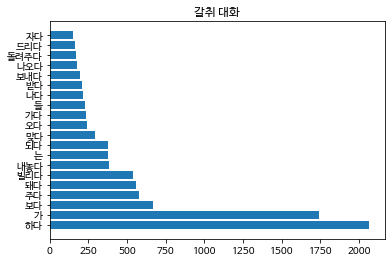

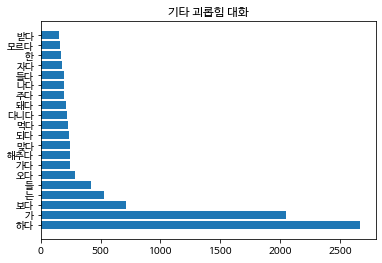

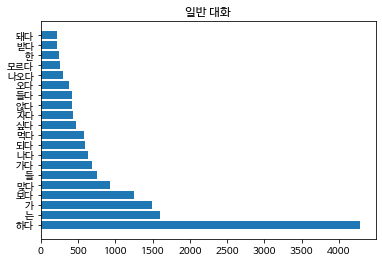

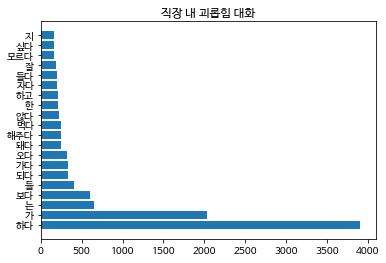

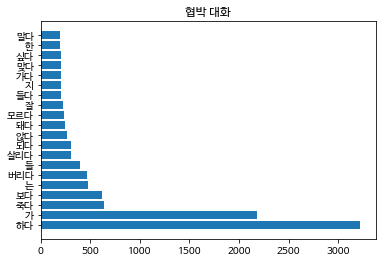

In [42]:
show_topVerbCount(okt_verbs_0, encoder.classes_[0])
show_topVerbCount(okt_verbs_1, encoder.classes_[1])
show_topVerbCount(okt_verbs_2, encoder.classes_[2])
show_topVerbCount(okt_verbs_3, encoder.classes_[3])
show_topVerbCount(okt_verbs_4, encoder.classes_[4])

## 데이터 분포

In [43]:
df_train.head()

,class,conversation,pre_conversation,okt_conversation,length
0,4,지금 너 스스로를 죽여달라고 애원하는 것인가?\n 아닙니다. 죄송합니다.\n 죽을 거면 혼자 죽지 우리까지 사건에 휘말리게 해? 진짜 죽여버리고 싶게.\n 정말 잘못했습니다.\n 너가 선택해. 너가 죽을래 네 가족을 죽여줄까.\n 죄송합니다. 정말 잘못했습니다.\n 너에게는 선택권이 없어. 선택 못한다면 너와 네 가족까지 모조리 죽여버릴거야.\n 선택 못하겠습니다. 한번만 도와주세요.\n 그냥 다 죽여버려야겠군. 이의 없지?\n 제발 도와주세요.,지금 너 스스로를 죽여달라고 애원하는 것인가 ? 아닙니다 . 죄송합니다 . 죽을 거면 혼자 죽지 우리까지 사건에 휘말리게 해 ? 진짜 죽여버리고 싶게 . 정말 잘못했습니다 . 너가 선택해 . 너가 죽을래 네 가족을 죽여줄까 . 죄송합니다 . 정말 잘못했습니다 . 너에게는 선택권이 없어 . 선택 못한다면 너와 네 가족까지 모조리 죽여버릴거야 . 선택 못하겠습니다 . 한번만 도와주세요 . 그냥 다 죽여버려야겠군 . 이의 없지 ? 제발 도와주세요 .,지금 너 스스로 를 죽이다 달라 고 애원 하다 것 인가 ? 아니다 . 죄송하다 . 죽 을 거 면 혼자 죽지 우리 까지 사건 에 휘 말리 게 해 ? 진짜 죽이다 버리다 싶다 . 정말 잘 못 하다 . 너 가 선택 하다 . 너 가 죽다 네 가족 을 죽여주다 . 죄송하다 . 정말 잘 못 하다 . 너 에게는 선택 권 이 없다 . 선택 못 하다 너 와 네 가족 까지 모조리 죽이다 버리다 . 선택 못 하다 . 한번 만 도와주다 . 그냥 다 죽이다 버리다 . 이의 없다 ? 제발 도와주다 .,268
1,4,길동경찰서입니다.\n9시 40분 마트에 폭발물을 설치할거다.\n네?\n똑바로 들어 한번만 더 얘기한다.\n장난전화 걸지 마시죠. \n9시 40분 마트에 폭발물이 터지면 다 죽는거야. \n장난전화는 업무방해죄에 해당됩니다.\n판단은 너에게 달려있다. 길동경찰서에도 폭발물 터지면 꽤나 재미있겠지.\n선생님 진정하세요.\n난 이야기했어. 경고했다는 말이야.,길동경찰서입니다 . 9시 40분 마트에 폭발물을 설치할거다 . 네 ? 똑바로 들어 한번만 더 얘기한다 . 장난전화 걸지 마시죠 . 9시 40분 마트에 폭발물이 터지면 다 죽는거야 . 장난전화는 업무방해죄에 해당됩니다 . 판단은 너에게 달려있다 . 길동경찰서에도 폭발물 터지면 꽤나 재미있겠지 . 선생님 진정하세요 . 난 이야기했어 . 경고했다는 말이야 .,길동 경찰서 이다 . 9시 40분 마트 에 폭발물 을 설치 하다 . 네 ? 똑바로 들다 한번 만 더 얘기 하다 . 장난 전화 걸다 말다 . 9시 40분 마트 에 폭발물 이 터지다 다 죽다 . 장난 전화 는 업무방해죄 에 해당 되다 . 판단 은 너 에게 달다 . 길동 경찰서 에도 폭발물 터지다 꽤 나 재미있다 . 선생님 진정하다 . 난 이야기 하다 . 경고 하다 말 이야 .,209
2,1,너 되게 귀여운거 알지? 나보다 작은 남자는 첨봤어.\n그만해. 니들 놀리는거 재미없어.\n지영아 너가 키 160이지? 그럼 재는 160도 안돼는거네?\n너 군대도 안가고 좋겠다.\n니들이 나 작은데 보태준거 있냐?\n난쟁이들도 장가가고하던데. 너도 희망을 가져봐 \n더이상 하지마라. \n그 키크는 수술도 있대잖아? 니네 엄마는 그거 안해주디?\n나람 해줬어. 저 키로 어찌살아.\n제발 그만 괴롭히라고!,너 되게 귀여운거 알지 ? 나보다 작은 남자는 첨봤어 . 그만해 . 니들 놀리는거 재미없어 . 지영아 너가 키 160이지 ? 그럼 재는 160도 안돼는거네 ? 너 군대도 안가고 좋겠다 . 니들이 나 작은데 보태준거 있냐 ? 난쟁이들도 장가가고하던데 . 너도 희망을 가져봐 더이상 하지마라 . 그 키크는 수술도 있대잖아 ? 니네 엄마는 그거 안해주디 ? 나람 해줬어 . 저 키로 어찌살아 . 제발 그만 괴롭히라고 !,너 되게 귀엽다 알 지 ? 나 보다 작다 남자 는 첨 보다 . 그만하다 . 니 들 놀리다 재미없다 . 지영 아 너 가 키 160 이지 ? 그렇다 재는 160 도 안 돼다 ? 너 군대 도 안 가다 좋다 . 니 들 이 나 작다 보태 주다 있다 ? 난쟁이 들 도 장가 가다 . 너 도 희망 을 가다 보다 더 이상 하다 . 그 키크 는 수술 도 있다 대다 ? 니 네 엄마 는 그거 안 해주다 ? 나다 해주다 . 저 키로 어찌 살 아 . 제발 그만 괴롭히다 !,252
3,0,어이 거기\n예??\n너 말이야 너. 이리 오라고\n무슨 일.\n너 옷 좋아보인다?\n얘 돈 좀 있나봐\n아니에요.돈 없어요\n뒤져서 나오면 넌 죽는다\n오늘 피시방 콜?\n콜. 마지막 기회다. 있는거 다 내놔\n정말 없어요,어이 거기 예 ? ? 너 말이야 너 . 이리 오라고 무슨 일 . 너 옷 좋아보인다 ? 얘 돈 좀 있나봐 아니에요 . 돈 없어요 뒤져서 나오면 넌 죽는다 오늘 피시방 콜 ? 콜 . 마지막 기회다 . 있는거 다 내놔 정말 없어요,어이 거기 예 ? ? 너 말 이야 너 . 이리 오라 고 무슨 일 . 너 옷 좋다 보이다 ? 얘 돈 좀 있다 보다 아니다 . 돈 없다 뒤지다 나오다 넌 죽다 오늘 피시방 콜 ? 콜 . 마지막 기회 다 . 있다 다 내놓다 정말 없다,127
4,0,저기요 혹시 날이 너무 뜨겁잖아요? 저희 회사에서 이 선크림 파는데 한 번 손등에 발라보실래요?\n아 진짜요? 안 그래도 선크림 필요해서 알아보던 중인데 한 번 발라 볼게요!\n여기 한 번 발라보세요. 진짜 성분도 좋고 다 좋아요.\n음. 성분이 좋다고 하셔서 좋은거 같기는 한데 제 피부에 맞지 않나봐요. 피부가 따끔거리네요.\n이번에 진짜 열심히 연구해서 만든건데 피부가 많이 예민하신가봐요.\n네 많이 예민해요. 그럼 많이 파시고 안녕히 계세요.\n아니 저기요 돈 안내요?\n네? 발라보는것도 돈 내야 하나요?\n그럼 이거 누구한테 팔아요? 당신이 바른거를?\n아니 먼저 발라 보시라고 하셨잖아요. 먼저 권유해놓고 사라고 강매하는거 갈취인거 몰라요?\n내가 안 사도 된다고 말 한 적 있어? 그것도 모르고 바른걸 누구 탓 하나? 빨리 사 당신이 바른거 당신이 사야지\n진짜 어이가 없어서 다른 사람들한텐 이렇게 갈취하지마세요. 화딱지나네,저기요 혹시 날이 너무 뜨겁잖아요 ? 저희 회사에서 이 선크림 파는데 한 번 손등에 발라보실래요 ? 아 진짜요 ? 안 그래도 선크림 필요해서 알아보던 중인데 한 번 발라 볼게요 ! 여기 한 번 발라보세요 . 진짜 성분도 좋고 다 좋아요 . 음 . 성분이 좋다고 하셔서 좋은거 같기는 한데 제 피부에 맞지 않나봐요 . 피부가 따끔거리네요 . 이번에 진짜 열심히 연구해서 만든건데 피부가 많이 예민하신가봐요 . 네 많이 예민해요 . 그럼 많이 파시고 안녕히 계세요 . 아니 저기요 돈 안내요 ? 네 ? 발라보는것도 돈 내야 하나요 ? 그럼 이거 누구한테 팔아요 ? 당신이 바른거를 ? 아니 먼저 발라 보시라고 하셨잖아요 . 먼저 권유해놓고 사라고 강매하는거 갈취인거 몰라요 ? 내가 안 사도 된다고 말 한 적 있어 ? 그것도 모르고 바른걸 누구 탓 하나 ? 빨리 사 당신이 바른거 당신이 사야지 진짜 어이가 없어서 다른 사람들한텐 이렇게 갈취하지마세요 . 화딱지나네,저기 요 혹시 날 이 너무 뜨겁다 ? 저희 회사 에서 이 선크림 팔다 하다 번 손등 에 발라 보다 ? 아 진짜 요 ? 안 그래도 선크림 필요하다 알아보다 중 인데 하다 번 발라 보다 ! 여기 하다 번 발라 보다 . 진짜 성분 도 좋다 다 좋다 . 음 . 성분 이 좋다 하다 좋다 거 같다 한데 제 피부 에 맞다 않다 보다 . 피부 가 따끔 거리 네 요 . 이번 에 진짜 열심히 연구 하다 만들다 피부 가 많이 예민하다 가보다 . 네 많이 예민하다 . 그렇다 많이 파시 고 안녕하다 계세 요 . 아니다 저기 요 돈 안내 요 ? 네 ? 발라 보다 돈 내야 하나요 ? 그렇다 이 거 누구 한테 파다 ? 당신 이 바르다 ? 아니다 먼저 발라 보시 라고 하다 . 먼저 권유 하다 사라 고 강매 하다 갈취 인거 모르다 ? 내 가 안 사도 되다 말 하다 적 있다 ? 그것 도 모르다 바른 걸 누구 탓 하나 ? 빨리 사 당신 이 바르다 당신 이 사다 진짜 어이 가 

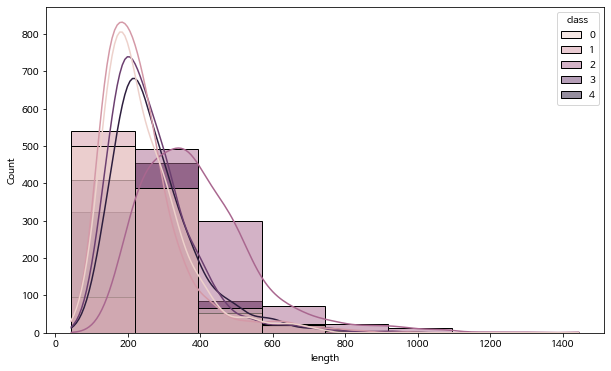

In [44]:
plt.figure(figsize=(10,6))
sns.histplot(data=df_train, x='length', bins=8, hue='class', kde=True)
plt.show()

In [45]:
len_0 = df_train[df_train['class'] == 0]['length']
len_1 = df_train[df_train['class'] == 1]['length']
len_2 = df_train[df_train['class'] == 2]['length']
len_3 = df_train[df_train['class'] == 3]['length']
len_4 = df_train[df_train['class'] == 4]['length']

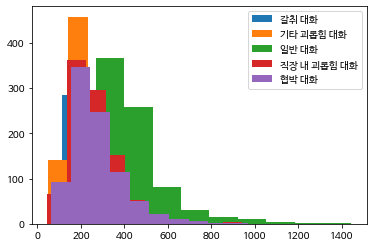

In [46]:
plt.rc('font', family='NanumBarunGothic')

plt.hist(len_0, bins=10, label=encoder.classes_[0])
plt.hist(len_1, bins=10, label=encoder.classes_[1])
plt.hist(len_2, bins=10, label=encoder.classes_[2])
plt.hist(len_3, bins=10, label=encoder.classes_[3])
plt.hist(len_4, bins=10, label=encoder.classes_[4])

plt.legend()
plt.show()

In [47]:
def print_minmaxmean(x, name):
    print('name : {}'.format(name))
    print('텍스트의 최소 : {}'.format(np.min(x)))
    print('텍스트의 최대 : {}'.format(np.max(x)))
    print('텍스트의 평균 : {}'.format(np.mean(x)))
    
print_minmaxmean(len_0, encoder.classes_[0])
print_minmaxmean(len_1, encoder.classes_[1])
print_minmaxmean(len_2, encoder.classes_[2])
print_minmaxmean(len_3, encoder.classes_[3])
print_minmaxmean(len_4, encoder.classes_[4])

name : 갈취 대화
텍스트의 최소 : 44
텍스트의 최대 : 739
텍스트의 평균 : 241.78931140801643
name : 기타 괴롭힘 대화
텍스트의 최소 : 47
텍스트의 최대 : 969
텍스트의 평균 : 238.25123639960435
name : 일반 대화
텍스트의 최소 : 138
텍스트의 최대 : 1444
텍스트의 평균 : 392.87963891675025
name : 직장 내 괴롭힘 대화
텍스트의 최소 : 45
텍스트의 최대 : 941
텍스트의 평균 : 263.13711340206186
name : 협박 대화
텍스트의 최소 : 63
텍스트의 최대 : 967
텍스트의 평균 : 274.55717488789236


In [48]:
def print_ratio(x, n_min, n_max, name):
    temp = x[(x <= n_max)&(x>=n_min)]
    print(f'길이가 {n_min} 이상 {n_max} 이하의 {name}')
    print(f'비율: {len(temp) / len(x) * 100:.2f}%, 전: {len(x)}, 후: {len(temp)}, 감소: {len(x)-len(temp)} \n')

MIN_LENGTH = 100
MAX_LENGTH = 600

print_ratio(len_0, MIN_LENGTH, MAX_LENGTH, encoder.classes_[0])
print_ratio(len_1, MIN_LENGTH, MAX_LENGTH, encoder.classes_[1])
print_ratio(len_2, MIN_LENGTH, MAX_LENGTH, encoder.classes_[2])
print_ratio(len_3, MIN_LENGTH, MAX_LENGTH, encoder.classes_[3])
print_ratio(len_4, MIN_LENGTH, MAX_LENGTH, encoder.classes_[4])

길이가 100 이상 600 이하의 갈취 대화
비율: 95.68%, 전: 973, 후: 931, 감소: 42 

길이가 100 이상 600 이하의 기타 괴롭힘 대화
비율: 95.35%, 전: 1011, 후: 964, 감소: 47 

길이가 100 이상 600 이하의 일반 대화
비율: 91.37%, 전: 997, 후: 911, 감소: 86 

길이가 100 이상 600 이하의 직장 내 괴롭힘 대화
비율: 96.70%, 전: 970, 후: 938, 감소: 32 

길이가 100 이상 600 이하의 협박 대화
비율: 96.86%, 전: 892, 후: 864, 감소: 28 



## 데이터 길이에 따른 전처리

In [50]:
df_train = df_train[(df_train['length']>=MIN_LENGTH) & (df_train['length']<=MAX_LENGTH)]

## 저장

In [51]:
# 설정값
settings = {
    'morpheme': 'okt',
    'min_length': MIN_LENGTH,
    'max_length': MAX_LENGTH,
    'encoder_classes':{
        0:encoder.classes_[0],
        1:encoder.classes_[1],
        2:encoder.classes_[2],
        3:encoder.classes_[3],
        4:encoder.classes_[4],
    }
}

In [52]:
import json

with open(PATH+'settings.json', 'w') as f:
    json.dump(settings,f)
df_train.to_csv(PATH+'train_custom.csv', index=False)